<a href="https://colab.research.google.com/github/eda426/-gen-alan-hesaplama/blob/main/_W_Code2_0_VERIBILIMIVEYAPAYZEKA_atolyecileri_Eda%C3%96zdemirKurt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 1. Geniş MGM verisini oku
df_mgm = pd.read_excel("MGM_2015_2024_Genis_Veriseti.xlsx")

# 2. Kaggle verisini oku ve işlem yap
df_kaggle = pd.read_csv("cities.csv")
df_kaggle["date"] = pd.to_datetime(df_kaggle["date"])
df_kaggle["Yıl"] = df_kaggle["date"].dt.year
df_kaggle["Ay"] = df_kaggle["date"].dt.month

# 3. Şehir → Bölge eşleştirmesi
sehir_bolge = {
    "Istanbul": "Marmara",
    "Ankara": "İç Anadolu",
    "Izmir": "Ege",
    "Bursa": "Marmara",
    "Adana": "Akdeniz",
    "Trabzon": "Karadeniz",
    "Erzurum": "Doğu Anadolu",
    "Diyarbakir": "Güneydoğu Anadolu"
}
df_kaggle["Bölge"] = df_kaggle["city_name"].map(sehir_bolge)

# 4. Aylık bölgesel ortalamaları al
df_kaggle_aylik = df_kaggle.groupby(["Yıl", "Ay", "Bölge"]).agg({
    "precipitation_sum": "mean",
    "daily_avg_temp": "mean",
    "avg_relative_humidity": "mean",
    "avg_pressure": "mean"
}).reset_index()

# 5. Birleştir
df_birlesik = pd.merge(df_mgm, df_kaggle_aylik, on=["Yıl", "Ay", "Bölge"], how="inner")

# 6. Excel olarak kaydet
df_birlesik.to_excel("Birlesik_MGM_Kaggle_2015_2024.xlsx", index=False)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_excel("Birlesik_MGM_Kaggle_2015_2024.xlsx")
data

,Yıl,Ay,Bölge,Toplam_Yagis_mm,Normale_Gore_Degisim,precipitation_sum,daily_avg_temp,avg_relative_humidity,avg_pressure
0,2020,1,Marmara,21.8,9.8,0.000000,5.190000,76.266774,1024.102258
1,2020,1,Akdeniz,40.8,-5.1,0.000000,9.869355,65.298387,1018.341290
2,2020,1,İç Anadolu,31.9,29.8,0.000000,0.143226,76.350645,1022.847742
3,2020,2,Marmara,48.7,-18.6,0.000000,8.367931,70.187586,1018.076207
4,2020,2,Akdeniz,99.1,-26.1,0.000000,10.478276,64.911724,1017.549655
...,...,...,...,...,...,...,...,...,...
175,2024,11,Akdeniz,97.5,-11.7,4.506667,15.900000,59.003667,1017.770667
176,2024,11,İç Anadolu,75.6,-3.2,1.310000,6.562000,73.408000,1021.599333
177,2024,12,Marmara,49.2,25.8,4.416129,9.114516,80.176452,1020.067742
178,2024,12,Akdeniz,73.3,22.7,4.825806,11.971290,66.095806,1019.959355


In [ ]:
data.head(10)

,Yıl,Ay,Bölge,Toplam_Yagis_mm,Normale_Gore_Degisim,precipitation_sum,daily_avg_temp,avg_relative_humidity,avg_pressure
0,2020,1,Marmara,21.8,9.8,0.0,5.190000,76.266774,1024.102258
1,2020,1,Akdeniz,40.8,-5.1,0.0,9.869355,65.298387,1018.341290
2,2020,1,İç Anadolu,31.9,29.8,0.0,0.143226,76.350645,1022.847742
3,2020,2,Marmara,48.7,-18.6,0.0,8.367931,70.187586,1018.076207
4,2020,2,Akdeniz,99.1,-26.1,0.0,10.478276,64.911724,1017.549655
5,2020,2,İç Anadolu,128.6,-2.8,0.0,3.708966,67.948966,1017.157931
6,2020,3,Marmara,140.6,26.8,0.0,10.487097,74.287097,1016.053548
7,2020,3,Akdeniz,110.2,-5.5,0.0,15.322581,67.559355,1012.420323
8,2020,3,İç Anadolu,23.6,-20.6,0.0,8.550000,59.546452,1014.737419
9,2020,4,Marmara,22.8,-23.8,0.0,12.669333,65.970000,1015.571667


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Yıl                    180 non-null    int64  
 1   Ay                     180 non-null    int64  
 2   Bölge                  180 non-null    object 
 3   Toplam_Yagis_mm        180 non-null    float64
 4   Normale_Gore_Degisim   180 non-null    float64
 5   precipitation_sum      180 non-null    float64
 6   daily_avg_temp         180 non-null    float64
 7   avg_relative_humidity  180 non-null    float64
 8   avg_pressure           180 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 12.8+ KB


In [ ]:
data.isnull().any()

,0
Yıl,False
Ay,False
Bölge,False
Toplam_Yagis_mm,False
Normale_Gore_Degisim,False
precipitation_sum,False
daily_avg_temp,False
avg_relative_humidity,False
avg_pressure,False


In [ ]:
# Yıllara göre MGM yağış ortalaması
yillik_yagis_ortalama = df_mgm.groupby("Yıl")[["Toplam_Yagis_mm"]].mean().reset_index()
yillik_yagis_ortalama

,Yıl,Toplam_Yagis_mm
0,2015,84.636905
1,2016,94.298810
2,2017,85.248810
3,2018,85.208333
4,2019,83.620238
5,2020,80.798810
6,2021,98.269048
7,2022,87.488095
8,2023,94.046429
9,2024,87.475000


Grafikte görüldüğü gibi Türkiye'de 2015–2024 yılları arasında ortalama yağış miktarında dalgalanmalar yaşanmıştır.
Bazı yıllar örneğin 2021 yüksek yağış alırken, bazı yıllarda düşüşler gözlemlenmiştir. Bu dalgalanmalar, kuraklık riskinin yıllar içinde nasıl değiştiğini anlamamıza yardımcı olur.

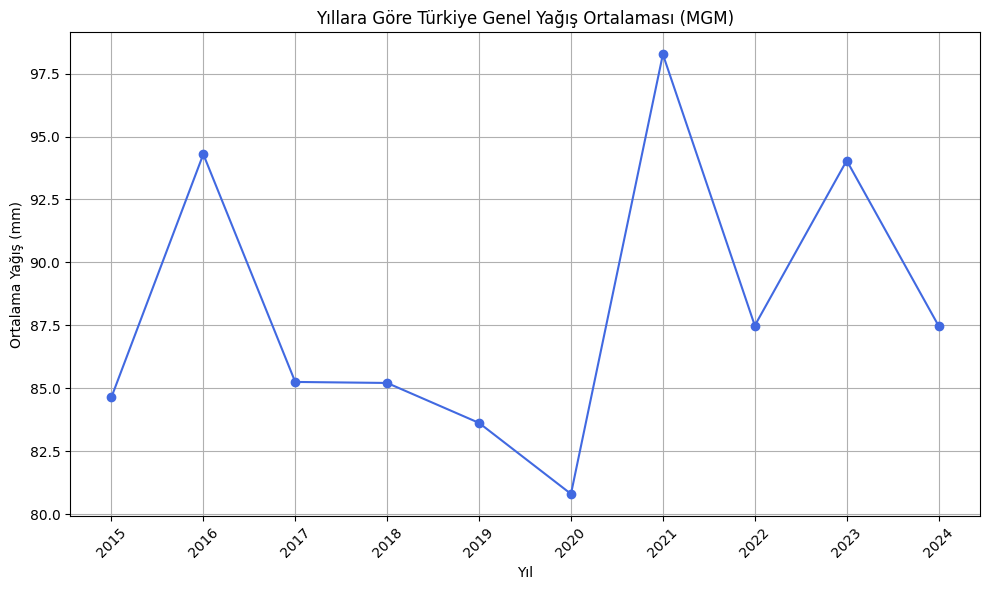

In [ ]:
# Genel yağış ortalaması yıllara göre
plt.figure(figsize=(10, 6))
plt.plot(yillik_yagis_ortalama["Yıl"], yillik_yagis_ortalama["Toplam_Yagis_mm"], marker='o', color='royalblue')
plt.title("Yıllara Göre Türkiye Genel Yağış Ortalaması (MGM)")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Yağış (mm)")
plt.xticks(ticks=yillik_yagis_ortalama["Yıl"], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_kaggle["Yıl"].unique()

array([2020, 2021, 2022, 2023, 2024, 2025], dtype=int32)

In [ ]:
df_mgm["Yıl"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

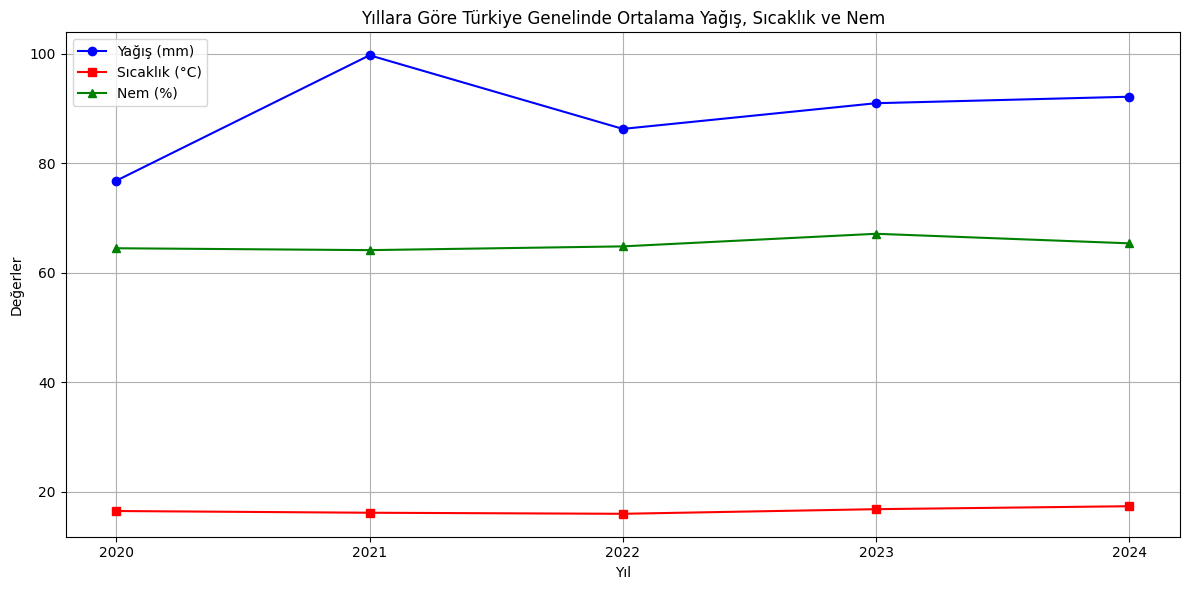

In [ ]:
df_yillik = df_birlesik.groupby("Yıl").agg({
    "Toplam_Yagis_mm": "mean",
    "daily_avg_temp": "mean",
    "avg_relative_humidity": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_yillik["Yıl"], df_yillik["Toplam_Yagis_mm"], marker="o", label="Yağış (mm)", color="blue")
plt.plot(df_yillik["Yıl"], df_yillik["daily_avg_temp"], marker="s", label="Sıcaklık (°C)", color="red")
plt.plot(df_yillik["Yıl"], df_yillik["avg_relative_humidity"], marker="^", label="Nem (%)", color="green")
plt.title("Yıllara Göre Türkiye Genelinde Ortalama Yağış, Sıcaklık ve Nem")
plt.xlabel("Yıl")
plt.ylabel("Değerler")
plt.xticks(ticks=range(2020, df_yillik["Yıl"].max() + 1))  # Bu satır buçuklu yılı engeller
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_bolge_yagis = df_mgm.groupby(["Yıl", "Bölge"])["Toplam_Yagis_mm"].mean().reset_index()
df_bolge_yagis

,Yıl,Bölge,Toplam_Yagis_mm
0,2015,Akdeniz,78.391667
1,2015,Doğu Anadolu,89.275000
2,2015,Ege,72.783333
3,2015,Güneydoğu Anadolu,66.983333
4,2015,Karadeniz,94.816667
...,...,...,...
65,2024,Ege,82.000000
66,2024,Güneydoğu Anadolu,84.258333
67,2024,Karadeniz,76.283333
68,2024,Marmara,92.200000


/tmp/ipython-input-46-953413795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Yıl", y = "Toplam_Yagis_mm",data=df_bolge_yagis,palette="Set2")


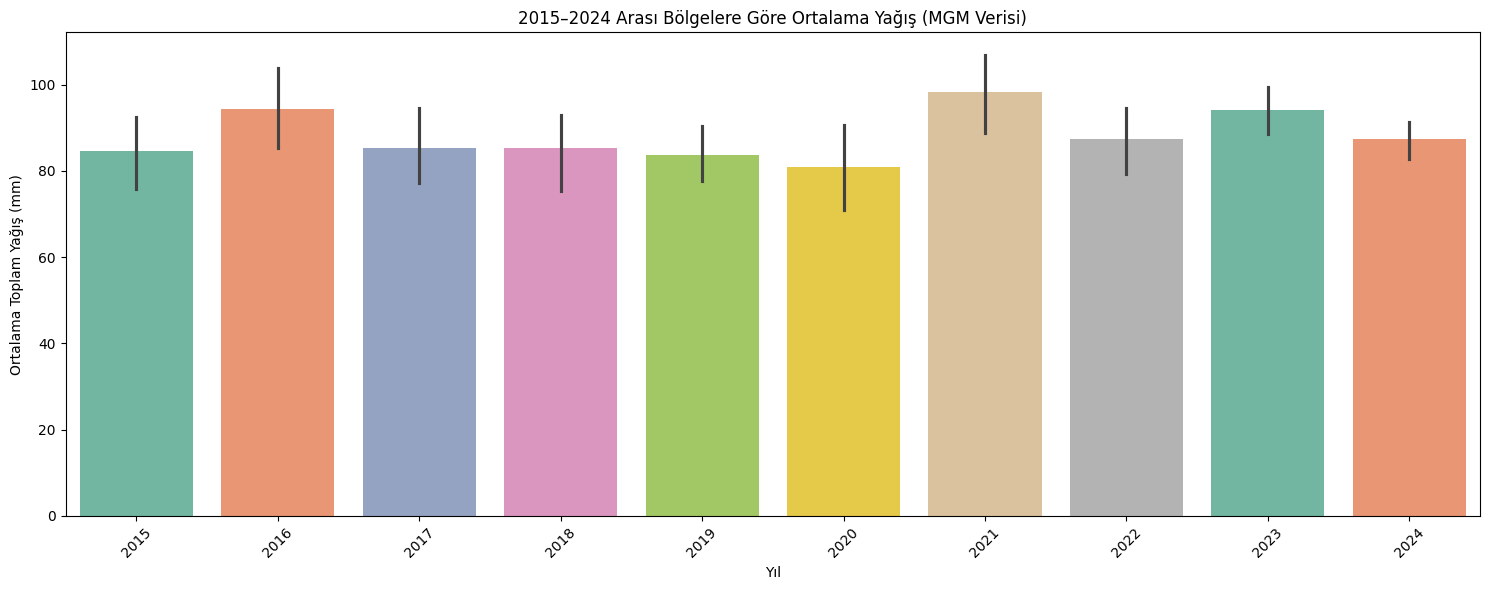

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = "Yıl", y = "Toplam_Yagis_mm",data=df_bolge_yagis,palette="Set2")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Toplam Yağış (mm)")
plt.title("2015–2024 Arası Bölgelere Göre Ortalama Yağış (MGM Verisi)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

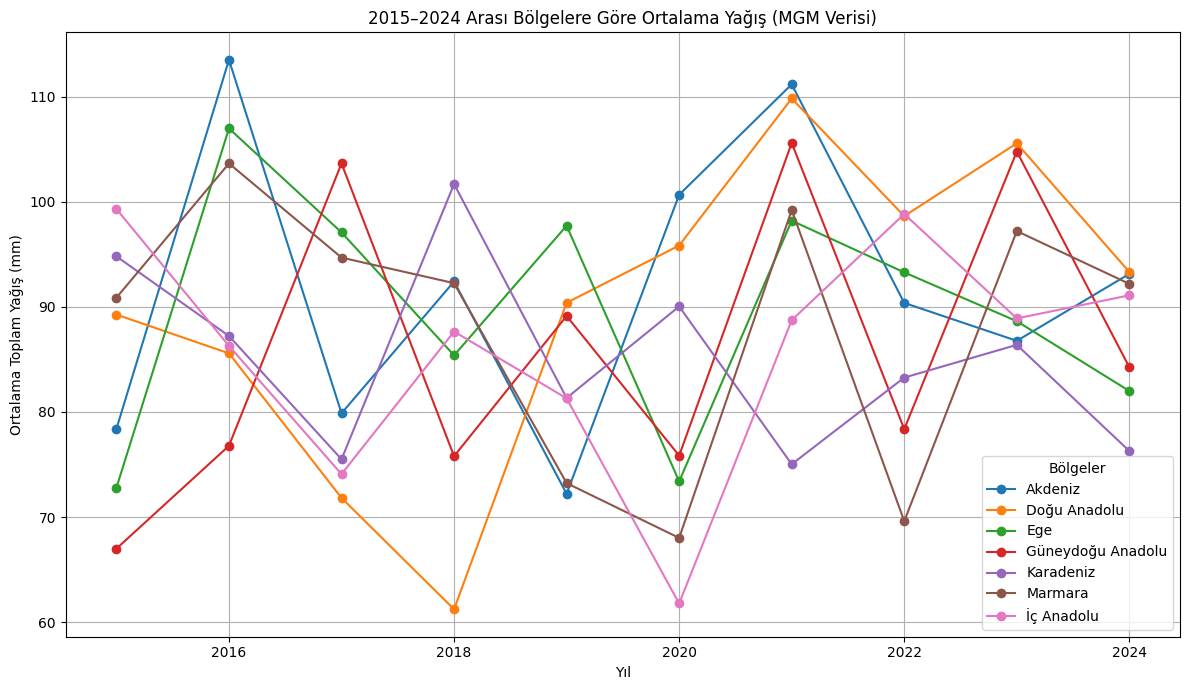

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

for bolge in df_bolge_yagis["Bölge"].unique():
    subset = df_bolge_yagis[df_bolge_yagis["Bölge"] == bolge]
    plt.plot(subset["Yıl"], subset["Toplam_Yagis_mm"], marker="o", label=bolge)

plt.title("2015–2024 Arası Bölgelere Göre Ortalama Yağış (MGM Verisi)")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Toplam Yağış (mm)")

plt.legend(title="Bölgeler")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_birlesik["Bölge"].unique()

array(['Marmara', 'Akdeniz', 'İç Anadolu'], dtype=object)

In [ ]:
df_kaggle["city_name"].unique()

array(['Adana', 'Ankara', 'Antalya', 'Bursa', 'Gaziantep', 'İstanbul',
       'İzmir', 'Kocaeli', 'Konya', 'Şanlıurfa'], dtype=object)

In [ ]:
df_kaggle[df_kaggle["Bölge"].isnull()]["city_name"].value_counts()

,count
city_name,
Antalya,1978
Gaziantep,1978
İstanbul,1978
İzmir,1978
Kocaeli,1978
Konya,1978
Şanlıurfa,1978


In [9]:
#En Yağışlı ve En Kurak Bölgeler (Ortalama)
bolge_ortalama = df_mgm.groupby("Bölge")[["Toplam_Yagis_mm"]].mean().sort_values(by="Toplam_Yagis_mm", ascending=False)

print("En yağışlıdan en kurak bölgeye sıralama:")
print(bolge_ortalama)

En yağışlıdan en kurak bölgeye sıralama:
                   Toplam_Yagis_mm
Bölge                             
Akdeniz                  91.862500
Doğu Anadolu             90.155000
Ege                      89.555000
Marmara                  88.100833
Güneydoğu Anadolu        86.125000
İç Anadolu               85.803333
Karadeniz                85.161667


In [6]:
#Kuraklık sınıflandırması yapalım
import pandas as pd



# 2. Kuraklık etiketi fonksiyonu
def kuraklik_etiketle(degisim):
    if degisim <= -10:
        return "Kurak"
    elif degisim >= 10:
        return "Yağışlı"
    else:
        return "Normal"

# 3. Yeni sütun olarak ata
df_mgm["Kuraklik_Durumu"] =df_mgm["Normale_Gore_Degisim"].apply(kuraklik_etiketle)

# 4. Etiket dağılımı (kaç tane Kurak/Normal/Yağışlı var?)
print(df_mgm["Kuraklik_Durumu"].value_counts())






Kuraklik_Durumu
Normal     296
Yağışlı    287
Kurak      257
Name: count, dtype: int64


/tmp/ipython-input-9-1117576737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_mgm, x="Kuraklik_Durumu", palette="Set2")


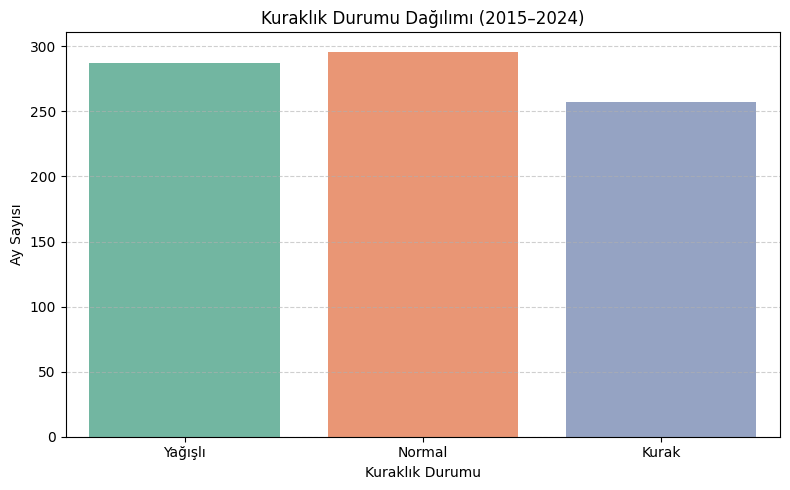

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_mgm, x="Kuraklik_Durumu", palette="Set2")
plt.title("Kuraklık Durumu Dağılımı (2015–2024)")
plt.xlabel("Kuraklık Durumu")
plt.ylabel("Ay Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Bu grafikte, 2015 ile 2024 yılları arasında Türkiye genelindeki 7 coğrafi bölgeye ait toplam 840 aylık gözlemin kuraklık sınıflandırmasına göre dağılımı yer almaktadır.

Kurak olarak sınıflandırılan aylar, uzun yıllar ortalamasına göre yağışın en az %10 azaldığı dönemleri göstermektedir.

Normal aylar, -10% ile +10% değişim aralığında kalan, yani geçmiş ortalamalara yakın geçen aylardır.

Yağışlı aylar ise %10 ve üzeri pozitif sapma gösteren, yani normallerin oldukça üzerinde yağış alan dönemlerdir.

Bu dağılıma baktığımızda, kurak geçen ay sayısının dikkat çekici seviyede olduğunu görüyoruz. Bu da Türkiye’nin birçok bölgesinde kuraklık riskinin belirgin hale geldiğini ve sürdürülebilir su yönetimi politikalarının önem kazandığını göstermektedir."

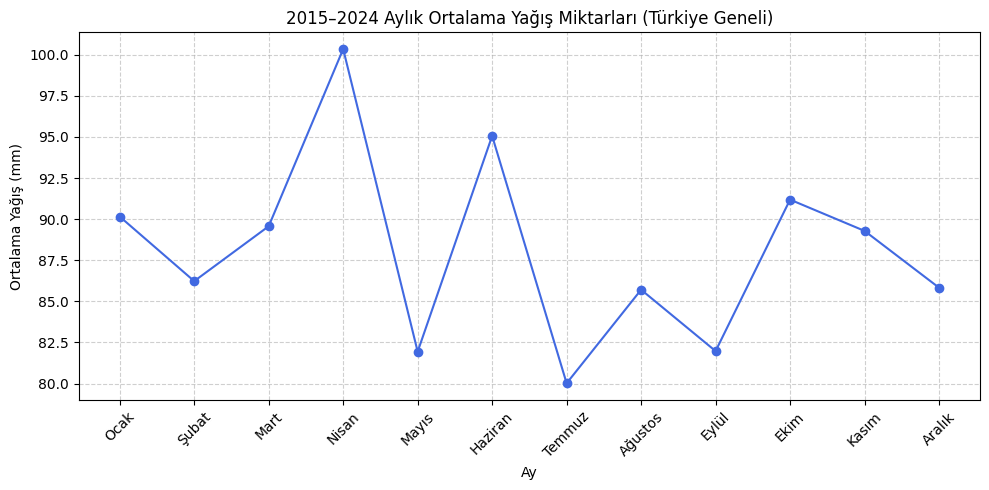

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# MGM verisini yükle
df = pd.read_excel("MGM_2015_2024_Genis_Veriseti.xlsx")

# Ay bazında ortalama yağış hesapla
aylik_trend = df.groupby("Ay")[["Toplam_Yagis_mm"]].mean().reset_index()

# Ay adlarını ekle
ay_isimleri = {
    1: "Ocak", 2: "Şubat", 3: "Mart", 4: "Nisan", 5: "Mayıs", 6: "Haziran",
    7: "Temmuz", 8: "Ağustos", 9: "Eylül", 10: "Ekim", 11: "Kasım", 12: "Aralık"
}
aylik_trend["Ay_Adi"] = aylik_trend["Ay"].map(ay_isimleri)

# Ay sırasına göre sırala
aylik_trend = aylik_trend.sort_values("Ay")

# Grafik çiz
plt.figure(figsize=(10, 5))
plt.plot(aylik_trend["Ay_Adi"], aylik_trend["Toplam_Yagis_mm"], marker="o", color="royalblue")
plt.title("2015–2024 Aylık Ortalama Yağış Miktarları (Türkiye Geneli)")
plt.xlabel("Ay")
plt.ylabel("Ortalama Yağış (mm)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


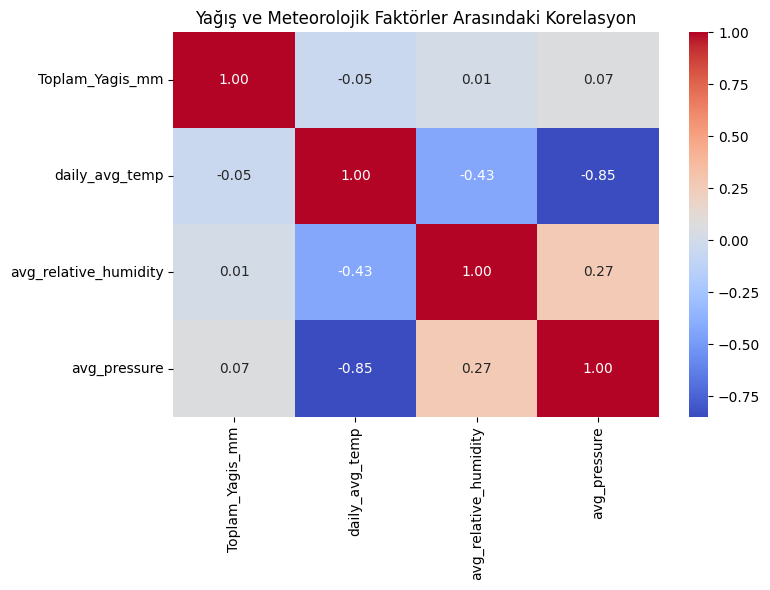

In [3]:
korelasyon_df = df_birlesik[[
    "Toplam_Yagis_mm", "daily_avg_temp", "avg_relative_humidity", "avg_pressure"
]]
corr_matrix = korelasyon_df.corr()

# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Yağış ve Meteorolojik Faktörler Arasındaki Korelasyon")
plt.tight_layout()
plt.show()

Bu grafikte yağışla meteorolojik faktörler arasındaki korelasyon analizini görüyoruz.
yağış miktarının sıcaklık, nem ve basınçla olan ilişkisi oldukça zayıf çıkmıştır.

Bu, yağışın yalnızca bu üç faktörle açıklanamayacağını ve daha karmaşık atmosferik sistemlere bağlı olduğunu göstermektedir.

Ancak sıcaklıkla basınç arasında güçlü negatif bir ilişki (r = -0.85) tespit edilmiştir. Bu da yüksek basınçlı sistemlerin genellikle düşük sıcaklıkla, düşük basınçlı sistemlerin ise yüksek sıcaklıkla ilişkili olduğunu ortaya koymaktadır.

In [4]:
bolgelere_gore_korelasyon = {}
bolgeler = df_birlesik["Bölge"].unique()

for bolge in bolgeler:
    df_bolge = df_birlesik[df_birlesik["Bölge"] == bolge]
    korelasyon = df_bolge[[
        "Toplam_Yagis_mm", "daily_avg_temp", "avg_relative_humidity", "avg_pressure"
    ]].corr()
    bolgelere_gore_korelasyon[bolge] = korelasyon["Toplam_Yagis_mm"].drop("Toplam_Yagis_mm")

# Tüm bölgeleri tablo olarak yazdır
df_korelasyon = pd.DataFrame(bolgelere_gore_korelasyon)
print(df_korelasyon)


                        Marmara   Akdeniz  İç Anadolu
daily_avg_temp        -0.031738 -0.208779   -0.067864
avg_relative_humidity  0.035022 -0.198523    0.055879
avg_pressure          -0.003444  0.243336    0.115607


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df_kaggle_aylik = df_kaggle.groupby(["Yıl", "Ay", "Bölge"]).agg({
    "precipitation_sum": "mean",
    "daily_avg_temp": "mean",
    "avg_relative_humidity": "mean",
    "avg_pressure": "mean"
}).reset_index()
df = pd.merge(df_mgm, df_kaggle_aylik, on=["Yıl", "Ay", "Bölge"], how="inner")

# Kuraklık etiketi oluştur
def kuraklik_etiketle(degisim):
    if degisim <= -10:
        return "Kurak"
    elif degisim >= 10:
        return "Yağışlı"
    else:
        return "Normal"

df["Kuraklik_Durumu"] = df["Normale_Gore_Degisim"].apply(kuraklik_etiketle)
X = df[["daily_avg_temp", "avg_relative_humidity", "avg_pressure", "precipitation_sum"]]
y = df["Kuraklik_Durumu"]

# Veriyi böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli kur ve eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap ve sonuçları göster
y_pred = model.predict(X_test)

print("📋 Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

print("\n🧩 Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))

📋 Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Kurak       0.33      0.15      0.21        13
      Normal       0.16      0.30      0.21        10
     Yağışlı       0.27      0.23      0.25        13

    accuracy                           0.22        36
   macro avg       0.25      0.23      0.22        36
weighted avg       0.26      0.22      0.22        36


🧩 Karışıklık Matrisi:
[[2 8 3]
 [2 3 5]
 [2 8 3]]


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# MGM verisini oku
df_mgm = pd.read_excel("MGM_2015_2024_Genis_Veriseti.xlsx")

# Bölge'yi sayısal forma çevir
le = LabelEncoder()
df_mgm["Bölge_Kod"] = le.fit_transform(df_mgm["Bölge"])

# Özellikler (X) ve hedef (y)
X = df_mgm[["Ay", "Yıl", "Bölge_Kod", "Normale_Gore_Degisim"]]
y = df_mgm["Toplam_Yagis_mm"]

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur ve eğit
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans değerlendirmesi
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Skoru: {r2:.2f}")


RMSE: 1797.13
R2 Skoru: -0.06


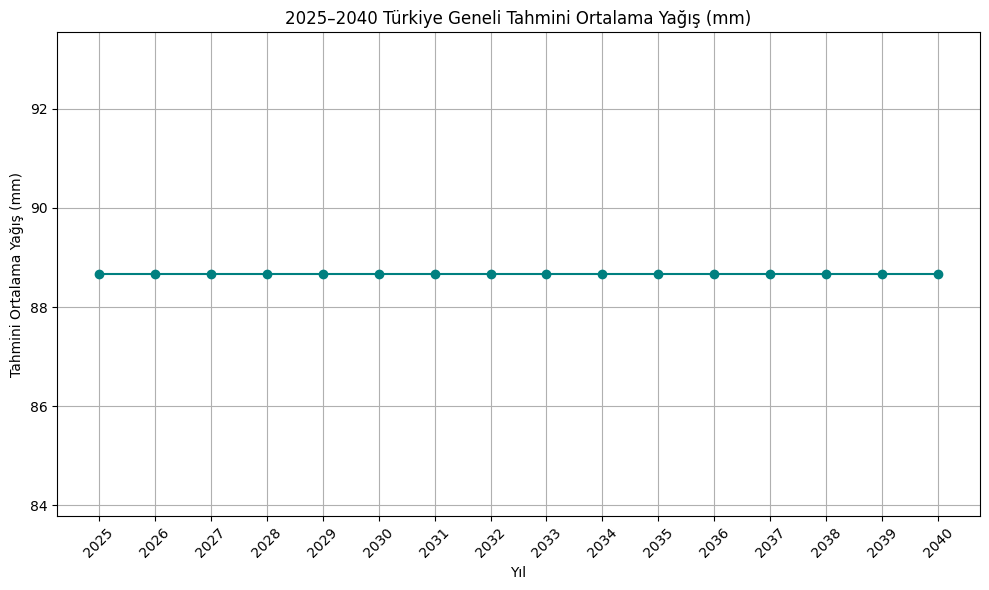

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# MGM verisini yükle
df_mgm = pd.read_excel("MGM_2015_2024_Genis_Veriseti.xlsx")

# Türkiye geneli ortalama aylık yağışı hesapla
df_genel = df_mgm.groupby(["Yıl", "Ay"])["Toplam_Yagis_mm"].mean().reset_index()

# Girdi ve hedef belirle
X = df_genel[["Yıl", "Ay"]]
y = df_genel["Toplam_Yagis_mm"]

# Model kur ve eğit
model = Pipeline([
    ("regressor", RandomForestRegressor(random_state=42))
])
model.fit(X, y)

# 2025–2040 arası tahmin yapılacak veri seti oluştur
future_years = list(range(2025, 2041))
months = list(range(1, 13))
future_data = pd.DataFrame([
    {"Yıl": year, "Ay": month}
    for year in future_years
    for month in months
])

# Tahmin yap
future_data["Tahmini_Yagis_mm"] = model.predict(future_data)

# Yıllık ortalamaları hesapla
future_avg = future_data.groupby("Yıl")["Tahmini_Yagis_mm"].mean().reset_index()

# Grafik çiz
plt.figure(figsize=(10, 6))
plt.plot(future_avg["Yıl"], future_avg["Tahmini_Yagis_mm"], marker="o", color="teal")
plt.title("2025–2040 Türkiye Geneli Tahmini Ortalama Yağış (mm)")
plt.xlabel("Yıl")
plt.ylabel("Tahmini Ortalama Yağış (mm)")
plt.xticks(ticks=future_avg["Yıl"], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


